# Project - EDA of IMDB dataset

## Index
[1. Introduction](#intro) <br>
[2. Data Wrangling](#wrangle) <br>
[3. EDA (exploratory data analysis)](#eda)<br>
[4. Conclusions](#con)<br>

<a id='intro' > </a>

### 1. Introduction


In [2]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='sum' ></a>
#### Summary of the dataset:
     The dataset chosen for EDA is the imdb data set with 21 columns. It provides data of movies released and other features like release date, cast, director, budget, revenue , populairty etc. 
Questions that can be explored from the dataset are :<br>
Which genres are most popular from year to year? <br>What kinds of properties are associated with movies that have high revenues?


#### Questions to be answered
1.

#### Resources
DAND program material and other online material from websites like stackoverflow and documentation of libraries

<a id='wrangle' > </a>
### 2. Data Wrangling

Data is loaded, is provided by imdb and can be downloaded [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). <br>
It is a good idea to explore the data using basic functions like : (describe, len, shape, anynull etc), look at the head tail, len etc and get an idea of what we are working with. <br>
There are certian columns which we will omit to make it easy for us to explore like is, overview, production companies etc)

#### Steps taken to clean the dataset
1. Changed release date to datetime data-type
2. Checked for null-values and removed the columns with highest null values which are not used in the analysis - ('overview', 'keywords', 'production_companies', 'id', 'homepage','tagline')
3. Removed the rows with null values using 'dropna'
4. the original shape of the dateset (10866, 21) was changed to (10725, 16)


In [2]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [34]:
df.shape
print('The shape of the imdb dataset is {}\n'.format(df.shape))

The shape of the imdb dataset is (10866, 21)



In [35]:
print('The basic describe function returns the following\n')
df.describe()


The basic describe function returns the following


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

In [46]:
df['release_date'] = pd.to_datetime(df['release_date'])
'''
release_date is converted to datetime to make analysis easy using pandas
'''

'\nrelease_date is converted to datetime to make analysis easy using pandas\n'

In [40]:
display(df.isnull().any())
'''
checking for null values
'''
print('The no.of columns with null values are {}\n\n'.format(df.isnull().any().sum()))
display(df.isnull().sum())
print('The total no.of null values in the dataset are {}\n\n'.format(df.isnull().sum().sum()))


imdb_id            True
popularity        False
budget            False
revenue           False
original_title    False
cast               True
director           True
runtime           False
genres             True
release_date      False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

The no.of columns with null values are 4




imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

The total no.of null values in the dataset are 153




In [11]:
display(df.isnull().sum())


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Dropping Null values
Homepage, tagline, keywords, production_companies have many null values and are not used in the analysis hence are dropped. Having two id is useless in the analysis so and imdb id is taken as unique id.

Removing all null values without changing the shape of the data set considerably.

In [36]:
df.drop(['overview', 'keywords', 'production_companies', 'id', 'homepage','tagline' ], axis=1, inplace = True)

In [43]:
df.isnull().sum().sum()
print('The no of null values after dropping unused columns {}\n'.format(df.isnull().sum().sum()))
df.dropna(axis = 0, how = 'any', inplace = True)
'''
Dropping rows with any null values
'''
final = df.shape
print('The final shape of the dataset is {}\nAnd the no of null values is {}\n'.format(df.shape, df.isnull().sum().sum()))



The no of null values after dropping unused columns 0

The final shape of the dataset is (10727, 15)
And the no of null values is 0



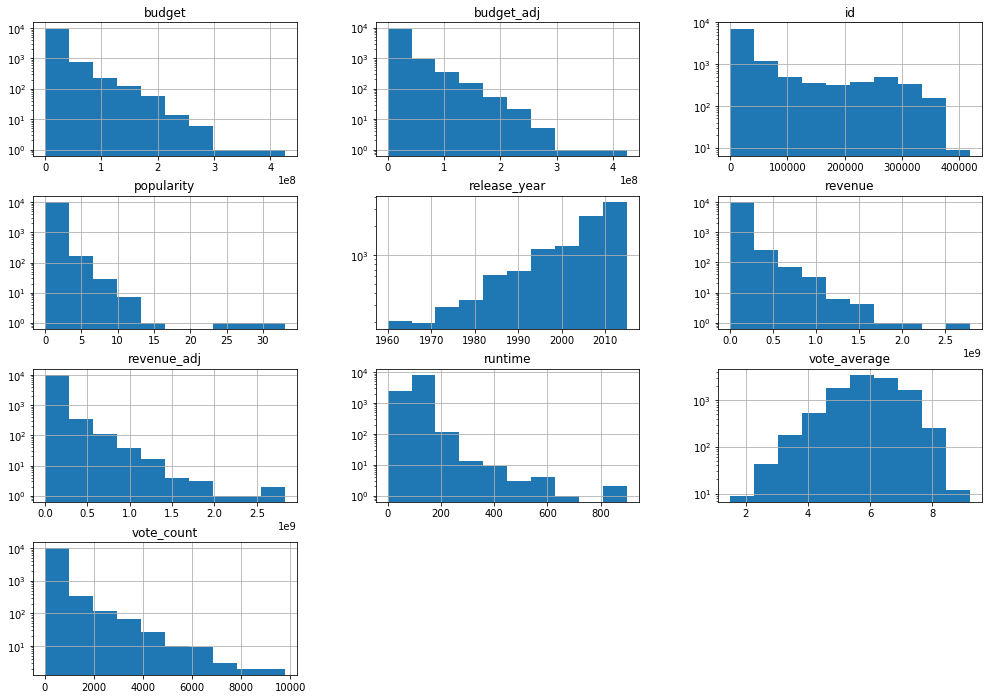

In [7]:
df.hist(figsize = (17,12), log = True);
'''
log tranforamtion is used to make the plot more easy to read
'''

From the histogram above certain trends can be seen 
1. Budget - It is right skewed, that is more no of movies have budget less then 1*le8. and the max is at 4.5*le8 (approx).
2. Popularity - It is right skewed with feew outliers, which means certain movies have received outstanding "popularity" than their peers.
3. Release_year - It is left skewed, and the no of movies released increased from 1960 to 1990(slow pace)  and from 1990 to 2010(avg pace)
4. Revenue - It is right skewed, and majority of the movies have grossed under 1*le9
5. Runtime - Majority of the movies have runtime under 200 minutes
6. Voter_average - It looks like normal distribution, with majority at 6.


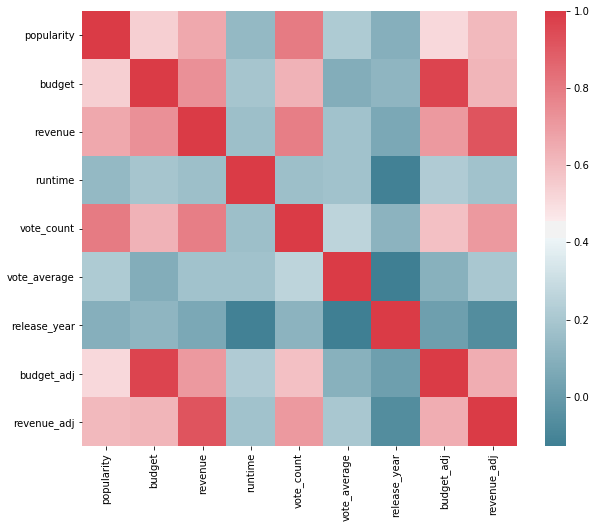

In [44]:
'''
using corr to find the co-relation between variables and plotting them using seaborn and matplotlib
'''
f, ax = plt.subplots(figsize=(10, 8));
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

1. Co-relation appears strong between budget and (popularity, revenue, voter_count)


In [45]:
# save new clean dataset which contains no duplicates or records with missing values in of interest.
# we will use this dataset in next sections
df.to_csv('clean_imdb.csv', index=False)

<a id='eda' > </a>
### 3. EDA
"""one dependent variable and three independent variables """ <br>
"""single variable 1d and multi variable 2d"""<br>
"""Reasoning is provided for each analysis decision, plot, and statistical summary."""<br>
"""Use statistical tests to draw rigorous conclusions where appropriate."""

In [3]:
df = pd.read_csv('clean_imdb.csv')
df.head()


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Question 1
How are Runtime, popularity, revunue changing overtime and is there a interrelatioon between them?

#### Runtime <br>
    Over the years runtime has relatively remained the same, the hasnot been major shift, but after 1990 there have been ouliers or movies whose runtime is outside the 200 minute mark. This can be seen in the scatterplot
   
    As seen from the description 50% of movies run between 90 to 112 minutes.
    Runtime and popularity is  normal distribution  if outliers are removed and a transformation is applied to smoothen the curve. And around 80% of the runtime is between

In [98]:
df['runtime'].describe() 

count    10727.000000
mean       102.492682
std         30.472103
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

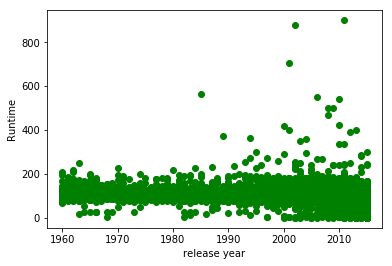

In [5]:
x= df['release_year']
y= df['runtime']
plt.scatter(x, y, c="g")
plt.xlabel("release year")
plt.ylabel("Runtime")
plt.show()

#### Popularity <br>
    There is a direct relationship between popularity and vote average, this can be attributed to the likeliness of more people voting on a popular movie than a unpopular one.
    Over the years popularity of movies has grown and this is because more people owning televison in the 90s and the boom of  multiplex and television in the 2000s and later period.
    Revenue and budget do not have major impact on populairty

    

In [6]:
df['popularity'].describe() 

count    10727.000000
mean         0.652774
std          1.004948
min          0.000188
25%          0.210766
50%          0.387190
75%          0.721488
max         32.985763
Name: popularity, dtype: float64

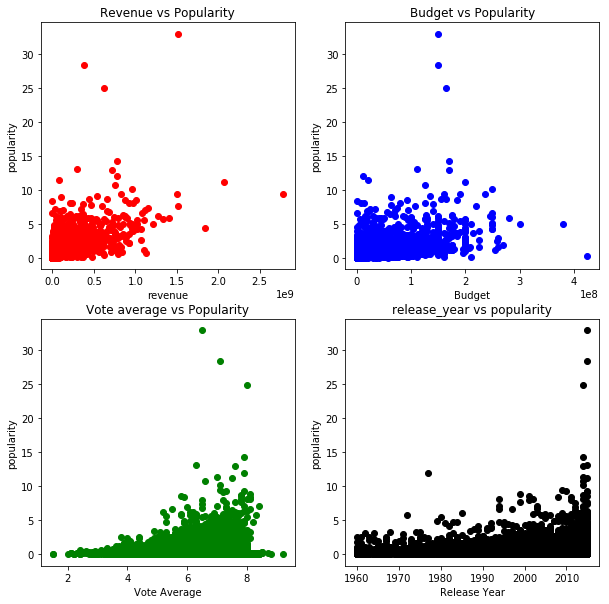

In [37]:
# create a figure
fig = plt.figure(figsize=(10, 10))
 
# define subplots and their positions in figure
plt1 = fig.add_subplot(221)
plt2 = fig.add_subplot(222)
plt3 = fig.add_subplot(223)
plt4 = fig.add_subplot(224)
 
# plotting points on each subplot
plt1.scatter(df['revenue'], df['popularity'], color ='r')
plt1.set_title('Revenue vs Popularity')
plt1.set_xlabel('revenue')
plt1.set_ylabel('popularity')

plt2.scatter(df['budget'], df['popularity'], color ='b')
plt2.set_title('Budget vs Popularity')
plt2.set_xlabel('Budget')
plt2.set_ylabel('popularity')
 
plt3.scatter(df['vote_average'], df['popularity'], color ='g')
plt3.set_title('Vote average vs Popularity')
plt3.set_xlabel('Vote Average')
plt3.set_ylabel('popularity')

 
plt4.scatter(df['release_year'], df['popularity'], color ='k')
plt4.set_title('release_year vs popularity')
plt4.set_xlabel('Release Year')
plt4.set_ylabel('popularity')

plt.show()




In [96]:
df['runtime'].describe() 

count    10727.000000
mean       102.492682
std         30.472103
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

Text(0,0.5,'popularity')

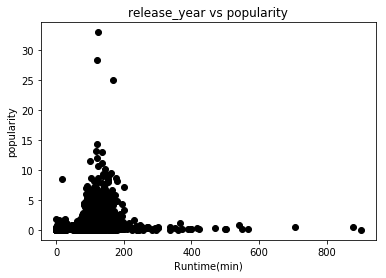

In [95]:
plt.scatter(df['runtime'], df['popularity'], color ='k')
plt.title('release_year vs popularity')
plt.xlabel('Runtime(min)')
plt.ylabel('popularity')

#### Revunue
    Overtime the revenue of movies have increased. In 1990 there is major shift in popularity, another one is at 2000. Since 1990 the movies became a profitable business.
    

In [39]:
df['revenue'].describe() 

count    1.072700e+04
mean     4.033501e+07
std      1.176717e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500263e+07
max      2.781506e+09
Name: revenue, dtype: float64

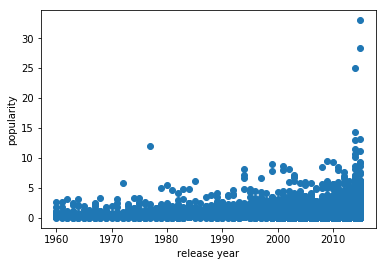

In [61]:
x= df['release_year']
y= df['popularity']
p= df['revenue']-df['budget']

plt.scatter(x, y)
plt.xlabel("release year")
plt.ylabel("popularity")
plt.show()

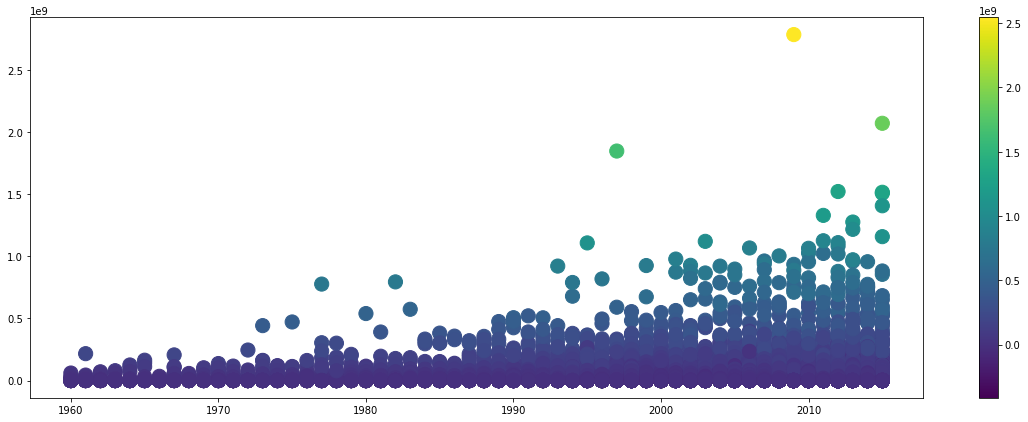

In [59]:
fig, ax = plt.subplots(figsize=(20,7))
p= df['revenue']-df['budget']
scat = ax.scatter(df['release_year'],df['revenue'],  c=p, s=200, marker='o')
fig.colorbar(scat)

plt.show()

#### Question 2 :
    Which is the most famous genre?
    The genres are spilt and made into an array. Finally the counts of individual genre is found to give the famous genre.

In [85]:
df2 = df['genres'].str.split('|', expand = True)
df2
df3 = df2.values
df3
df5 = df3[df3 != np.array(None)]
df6 = pd.DataFrame(df5)
df6[0].value_counts()



Drama              4745
Comedy             3775
Thriller           2903
Action             2372
Romance            1708
Horror             1636
Adventure          1463
Crime              1354
Science Fiction    1218
Family             1213
Fantasy             905
Mystery             808
Animation           662
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: 0, dtype: int64

<a id='con' > </a>
### 4. Conclusions

#### Limitations:
- The currency is not specified- As in what is the gross in individual countries and exchange rate etc. 
- In case of varying currencies [which is likely since the movies range from different regions], exchange rates or conversions or some sort of normalization would need to be applied.
- We also do not consider different revenue sources like movies ticket sales, audio rights sales, digital sales, braodcast sales, etc. and disregard the period and markets over which the revenues are collected. Older movies that are cast over television or re-released and might garner higher revenues are examples of limitations of the dataset and hence, this EDA. 
- Vote counts are taken at face value. The no.of vote counts differ for different movies, so the vote average cannot be trusted feature of a popular movie
- The medium through which popularity was determined is unknown. This can impact the analysis as the limitations and bias inherent while gauging audience response will be present in the end values too. 
- This analysis assumes that the same index and methods were employed for collecting popularity factors and counting votes for all movies. 
- While we did not have missing values for any of the factors under consideration, we acknowledge the presence of these limitations and assumptions in our analysis.

#### Conclusion:
- From this EDA it is clear that budget and revenue of the movies increased over time and there was a pattern between budget, revenue and popularity. 
- Also, ratings for directors had maximum likelihood of being in the 0 to 1 range.
- Revenues showed a wider range, but the most likely range was 0.01e8 to 0.1e8.
- We also analyzed who the most successful directors were popularity-wise and revenue-wise.
- However, these analysis do not account for collaborations.
- These lines of analysis point us to the need for further investigation, especially with regards to revenue and popularity.